###  هدف پروژه:
در این پروژه، هدف طراحی یک سیستم دیجیتال ساده برای تحلیل و پردازش سیگنال‌های یک‌بعدی است. مراحل این پروژه با محوریت فصل "مشخصات زمانی و فرکانسی سیگنال‌ها و سیستم‌ها" از کتاب اپنهایم شامل موارد زیر است:

1. **تحلیل انرژی و توان سیگنال‌های پیوسته و گسسته**
2. **تجزیه‌ی یک سیگنال به مؤلفه‌های زوج و فرد**
3. **انجام عملیات کانولوشن بین سیگنال و پاسخ ضربه**
4. **تحلیل پاسخ فرکانسی سیستم با استفاده از FFT**
5. **طراحی و اعمال یک فیلتر FIR پایین‌گذر بر روی سیگنال نویزی**
6. **مقایسه سیگنال اصلی، نویزی و فیلتر شده در حوزه‌ی زمان و فرکانس**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from scipy.signal import convolve, firwin, lfilter
from scipy.fft import fft, fftfreq, fftshift


In [2]:
t = np.linspace(-10, 10, 1000)
x1 = np.exp(-np.abs(t))
x2 = 1 / (1 + t**2)

energy_x1 = simpson(x1**2, t)
power_x1 = energy_x1 / (t[-1] - t[0])

energy_x2 = simpson(x2**2, t)
power_x2 = energy_x2 / (t[-1] - t[0])

print(f"✅ انرژی x1: {energy_x1:.4f}, توان x1: {power_x1:.4f}")
print(f"✅ انرژی x2: {energy_x2:.4f}, توان x2: {power_x2:.4f}")


✅ انرژی x1: 0.9999, توان x1: 0.0500
✅ انرژی x2: 1.5701, توان x2: 0.0785


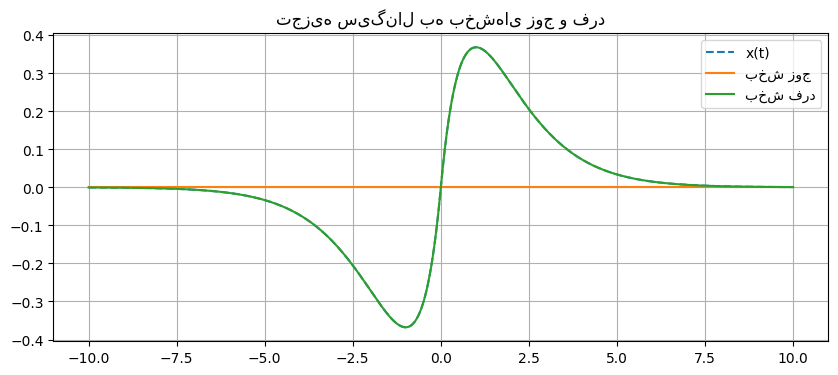

In [3]:
x = t * np.exp(-np.abs(t))
x_even = (x + x[::-1]) / 2
x_odd = (x - x[::-1]) / 2

plt.figure(figsize=(10, 4))
plt.plot(t, x, label="x(t)", linestyle="--")
plt.plot(t, x_even, label="بخش زوج")
plt.plot(t, x_odd, label="بخش فرد")
plt.title("تجزیه سیگنال به بخش‌های زوج و فرد")
plt.grid(True)
plt.legend()
plt.show()


In [4]:
x = np.array([1, 2, 3])
h = np.array([0, 1, 0.5])
y = convolve(x, h)

print(f"خروجی کانولوشن: {y}")


خروجی کانولوشن: [0.  1.  2.5 4.  1.5]


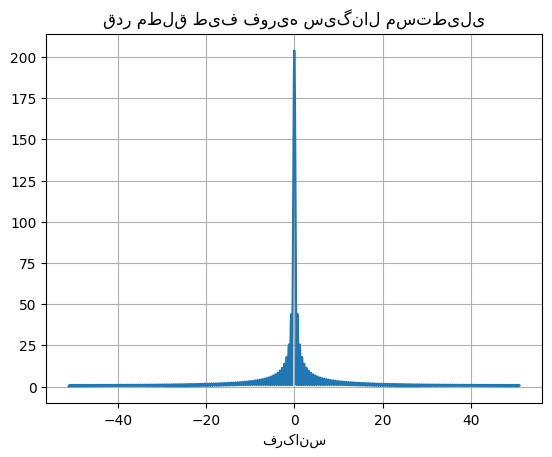

In [5]:
t = np.linspace(-5, 5, 1024)
x = np.where(np.abs(t) <= 1, 1, 0)  # سیگنال مستطیلی
X_f = fftshift(fft(x))
freqs = fftshift(fftfreq(len(t), d=t[1] - t[0]))

plt.plot(freqs, np.abs(X_f))
plt.title("قدر مطلق طیف فوریه سیگنال مستطیلی")
plt.xlabel("فرکانس")
plt.grid(True)
plt.show()


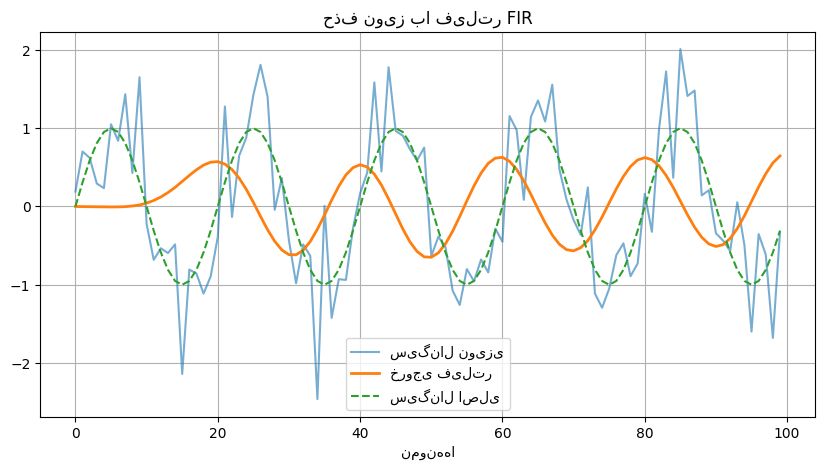

In [6]:
n = np.arange(0, 100)
x_clean = np.sin(2 * np.pi * 0.05 * n)
noise = 0.5 * np.random.randn(len(n))
x_noisy = x_clean + noise

num_taps = 31
cutoff = 0.1
h = firwin(num_taps, cutoff)

x_filtered = lfilter(h, 1.0, x_noisy)

plt.figure(figsize=(10, 5))
plt.plot(n, x_noisy, label="سیگنال نویزی", alpha=0.6)
plt.plot(n, x_filtered, label="خروجی فیلتر", linewidth=2)
plt.plot(n, x_clean, label="سیگنال اصلی", linestyle='--')
plt.title("حذف نویز با فیلتر FIR")
plt.xlabel("نمونه‌ها")
plt.grid(True)
plt.legend()
plt.show()
